# Assignment: DarkNet traffic detection

## Task:  Traffic Classification

Kaggle challenge: https://www.kaggle.com/peterfriedrich1/cicdarknet2020-internet-traffic

### CIC-Darknet2020

Darknet is the unused address space of the internet which is not speculated to interact with other computers in the world. Any communication from the dark space is considered sceptical owing to its passive listening nature which accepts incoming packets, but outgoing packets are not supported. Due to the absence of legitimate hosts in the darknet, any traffic is contemplated to be unsought and is characteristically treated as probe, backscatter, or misconfiguration. Darknets are also known as network telescopes, sinkholes, or blackholes.

Darknet traffic classification is significantly important to categorize real-time applications. Analyzing darknet traffic helps in early monitoring of malware before onslaught and detection of malicious activities after outbreak.


### Data
In CICDarknet2020 dataset, a two-layered approach is used to generate benign and darknet traffic at the first layer. The darknet traffic constitutes Audio-Stream, Browsing, Chat, Email, P2P, Transfer, Video-Stream and VOIP which is generated at the second layer. To generate the representative dataset, we amalgamated our previously generated datasets, namely, ISCXTor2016 and ISCXVPN2016, and combined the respective VPN and Tor traffic in corresponding Darknet categories. 

## Task 1: Problem Statement
Discuss the problem setting and the first implcations of the given data set... 
* What assumptions can we make about the data?
* What problems are we expecting?

## Task 2: First Data Analysis, Cleaning and Feature Extraction
* Import the data to a Pandas DataFrame
* Run first simple statistics and visualizations
* Is there a need to clean the data? If yes, do so...
* Can you use the raw data directly, or should you extract features? What features are suitable ? 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('Darknet.CSV' , encoding = "ISO-8859-1" )

In [3]:
data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING


### 2.1 Understand data and collect information about data / visualization

In [4]:
data.shape

(141530, 85)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     141530 non-null  object 
 1   Src IP                      141530 non-null  object 
 2   Src Port                    141530 non-null  int64  
 3   Dst IP                      141530 non-null  object 
 4   Dst Port                    141530 non-null  int64  
 5   Protocol                    141530 non-null  int64  
 6   Timestamp                   141530 non-null  object 
 7   Flow Duration               141530 non-null  int64  
 8   Total Fwd Packet            141530 non-null  int64  
 9   Total Bwd packets           141530 non-null  int64  
 10  Total Length of Fwd Packet  141530 non-null  int64  
 11  Total Length of Bwd Packet  141530 non-null  int64  
 12  Fwd Packet Length Max       141530 non-null  int64  
 13  Fwd Packet Len

In [6]:
data["Src IP"].nunique()

3914

#### Source and Destination IP

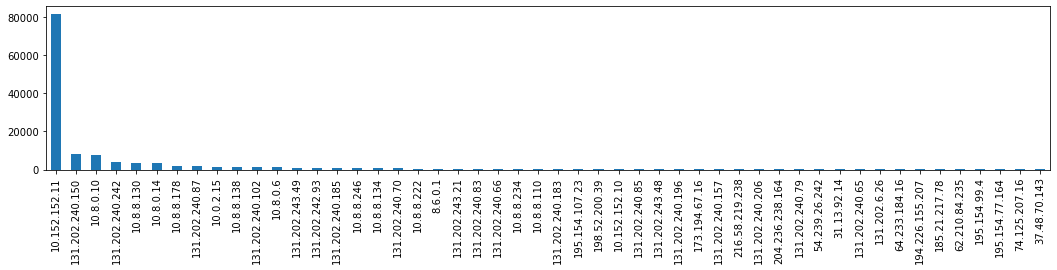

In [7]:
data['Src IP'].value_counts()[:50].plot.bar(figsize=(18,3));

In [8]:
data["Dst IP"].nunique()

7197

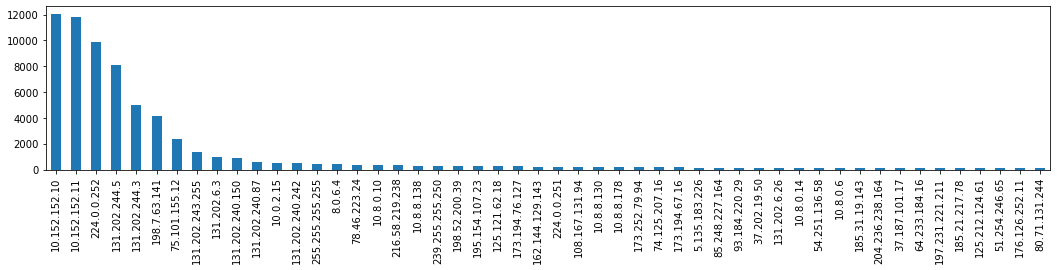

In [9]:
data['Dst IP'].value_counts()[:50].plot.bar(figsize=(18,3));

#### Labels

In [10]:
data.groupby(by="Label")['Label'].count()

Label
Non-Tor    93356
NonVPN     23863
Tor         1392
VPN        22919
Name: Label, dtype: int64

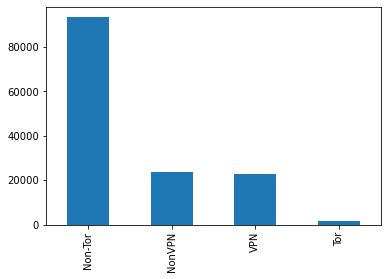

In [11]:
data['Label'].value_counts().plot.bar();

In [12]:
data.groupby(by="Label.1")['Label.1'].count()

Label.1
AUDIO-STREAMING     1484
Audio-Streaming    16580
Browsing           32808
Chat               11478
Email               6145
File-Transfer      11098
File-transfer         84
P2P                48520
VOIP                3566
Video-Streaming     9486
Video-streaming      281
Name: Label.1, dtype: int64

In [13]:
#rename entries "AUDIO-STREAMING" in "Audio-Streaming" 
data.loc[data["Label.1"]== "AUDIO-STREAMING", 'Label.1'] = "Audio-Streaming"
#rename entries "File-transfer" in "File-Transfer"
data.loc[data["Label.1"]== "File-transfer", 'Label.1'] = "File-Transfer"
##rename entries "Video-streaming" in "Video-Streaming" 
data.loc[data["Label.1"]== "Video-streaming", 'Label.1'] = "Video-Streaming"

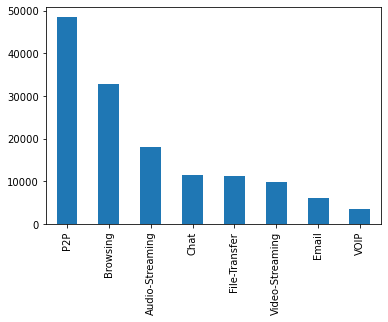

In [14]:
data['Label.1'].value_counts().plot.bar(); 

## 2.2 Clean Data

In [15]:
data.isnull().sum().sort_values(ascending = False)

Flow Bytes/s            47
Fwd IAT Min              0
Flow IAT Mean            0
Flow IAT Std             0
Flow IAT Max             0
                        ..
Down/Up Ratio            0
Average Packet Size      0
Fwd Segment Size Avg     0
Bwd Segment Size Avg     0
Flow ID                  0
Length: 85, dtype: int64

In [16]:
data['Flow Bytes/s'].isnull().sum()

47

In [17]:
data['Flow Bytes/s'].describe()

count    1.414830e+05
mean              inf
std               NaN
min      0.000000e+00
25%      0.000000e+00
50%      7.407686e+01
75%      9.908260e+02
max               inf
Name: Flow Bytes/s, dtype: float64

In [18]:
data.drop('Flow Bytes/s', axis=1, inplace=True)

In [19]:
#drop ID because no added value
data.drop('Flow ID', axis=1, inplace=True)

In [20]:
#remove column with infinity values
#data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.drop('Flow Packets/s', axis=1, inplace=True)

### 2.2.1. Find and delete duplicate columns

In [21]:
#find duplicate columns
def getDuplicateColumns(df):
    duplicateColumnNames = set()
    for x in range(df.shape[1]):
        col = df.iloc[:5000, x] 
        for y in range(x + 1, df.shape[1]):
            otherCol = df.iloc[0:5000, y] 
            if col.equals(otherCol): 
                duplicateColumnNames.add(df.columns.values[y]) 
    return list(duplicateColumnNames) 

In [22]:
duplicateColNames = getDuplicateColumns(data) 
print('Duplicate Columns are :')
for column in duplicateColNames : 
       print('Column Name : ', column) 

Duplicate Columns are :
Column Name :  Fwd Bulk Rate Avg
Column Name :  Active Mean
Column Name :  URG Flag Count
Column Name :  Fwd URG Flags
Column Name :  Fwd Bytes/Bulk Avg
Column Name :  Bwd URG Flags
Column Name :  Bwd Bytes/Bulk Avg
Column Name :  Fwd Segment Size Avg
Column Name :  Subflow Bwd Packets
Column Name :  Active Std
Column Name :  ECE Flag Count
Column Name :  Active Max
Column Name :  Active Min
Column Name :  CWE Flag Count
Column Name :  Fwd Packet/Bulk Avg


In [23]:
#Dropping duplicate columns
data = data.drop(columns = duplicateColNames) 

In [24]:
data.shape

(141530, 67)

In [25]:
#Change IP Adress columns
#Src ipv4 adress into 4 columns
data['Src IP 1'] = data['Src IP'].str.rsplit('.').str[0].astype('int') 
data['Src IP 2'] = data['Src IP'].str.rsplit('.').str[1].astype('int')
data['Src IP 3'] = data['Src IP'].str.rsplit('.').str[2].astype('int')
data['Src IP 4'] = data['Src IP'].str.rsplit('.').str[3].astype('int') 
#Dst ipv4 adress into 4 columns
data['Dst IP 1'] = data['Dst IP'].str.rsplit('.').str[0].astype('int') 
data['Dst IP 2'] = data['Dst IP'].str.rsplit('.').str[1].astype('int')
data['Dst IP 3'] = data['Dst IP'].str.rsplit('.').str[2].astype('int')
data['Dst IP 4'] = data['Dst IP'].str.rsplit('.').str[3].astype('int') 

data.drop(["Src IP","Dst IP"], axis=1, inplace=True)
data.head()

,Src Port,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,...,Label,Label.1,Src IP 1,Src IP 2,Src IP 3,Src IP 4,Dst IP 1,Dst IP 2,Dst IP 3,Dst IP 4
0,57158,443,6,24/07/2015 04:09:48 PM,229,1,1,0,0,0,...,Non-Tor,Audio-Streaming,10,152,152,11,216,58,220,99
1,57159,443,6,24/07/2015 04:09:48 PM,407,1,1,0,0,0,...,Non-Tor,Audio-Streaming,10,152,152,11,216,58,220,99
2,57160,443,6,24/07/2015 04:09:48 PM,431,1,1,0,0,0,...,Non-Tor,Audio-Streaming,10,152,152,11,216,58,220,99
3,49134,443,6,24/07/2015 04:09:48 PM,359,1,1,0,0,0,...,Non-Tor,Audio-Streaming,10,152,152,11,74,125,136,120
4,34697,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,64530,6659,131,...,Non-Tor,Audio-Streaming,10,152,152,11,173,194,65,127


In [26]:
#Change Timestamp Column
data['Timestamp Date'] = data['Timestamp'].str.rsplit(' ').str[0]
data['Timestamp Time'] = data['Timestamp'].str.rsplit(' ').str[1]
data['Timestamp AM/PM'] = data['Timestamp'].str.rsplit(' ').str[2]
data.drop("Timestamp", axis=1, inplace=True)
data.head()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Src IP 2,Src IP 3,Src IP 4,Dst IP 1,Dst IP 2,Dst IP 3,Dst IP 4,Timestamp Date,Timestamp Time,Timestamp AM/PM
0,57158,443,6,229,1,1,0,0,0,0,...,152,152,11,216,58,220,99,24/07/2015,04:09:48,PM
1,57159,443,6,407,1,1,0,0,0,0,...,152,152,11,216,58,220,99,24/07/2015,04:09:48,PM
2,57160,443,6,431,1,1,0,0,0,0,...,152,152,11,216,58,220,99,24/07/2015,04:09:48,PM
3,49134,443,6,359,1,1,0,0,0,0,...,152,152,11,74,125,136,120,24/07/2015,04:09:48,PM
4,34697,19305,6,10778451,591,400,64530,6659,131,0,...,152,152,11,173,194,65,127,24/07/2015,04:09:45,PM


In [27]:
#transform timestamp
from sklearn.preprocessing import LabelEncoder
data['Timestamp AM/PM'] = LabelEncoder().fit_transform(data['Timestamp AM/PM'])
data['Timestamp Date'] = LabelEncoder().fit_transform(data['Timestamp Date'])
data['Timestamp Time'] = LabelEncoder().fit_transform(data['Timestamp Time'])
data['Label'] = LabelEncoder().fit_transform(data['Label'])
data['Label.1'] = LabelEncoder().fit_transform(data['Label.1'])

data.head()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Src IP 2,Src IP 3,Src IP 4,Dst IP 1,Dst IP 2,Dst IP 3,Dst IP 4,Timestamp Date,Timestamp Time,Timestamp AM/PM
0,57158,443,6,229,1,1,0,0,0,0,...,152,152,11,216,58,220,99,19,7709,1
1,57159,443,6,407,1,1,0,0,0,0,...,152,152,11,216,58,220,99,19,7709,1
2,57160,443,6,431,1,1,0,0,0,0,...,152,152,11,216,58,220,99,19,7709,1
3,49134,443,6,359,1,1,0,0,0,0,...,152,152,11,74,125,136,120,19,7709,1
4,34697,19305,6,10778451,591,400,64530,6659,131,0,...,152,152,11,173,194,65,127,19,7707,1


#### LabelEncoder
##### Label.1
-  0: Audio-Streaming, 
-  1: Browsing
-  2: Chat
-  3: Email
-  4: File-Transfer
-  5: P2P
- 6: VOIP
-  7: Video-Streaming

##### Label
-  0: NonTor
-  1: Non VPN
-  2: Tor
-  3: VPN


In [28]:
#scale values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.values)
scaled_features_data = pd.DataFrame(scaled_features, index=data.index, columns=data.columns)
scaled_features_data["Label"] = data["Label"]
scaled_features_data["Label.1"] = data["Label.1"]
data = scaled_features_data

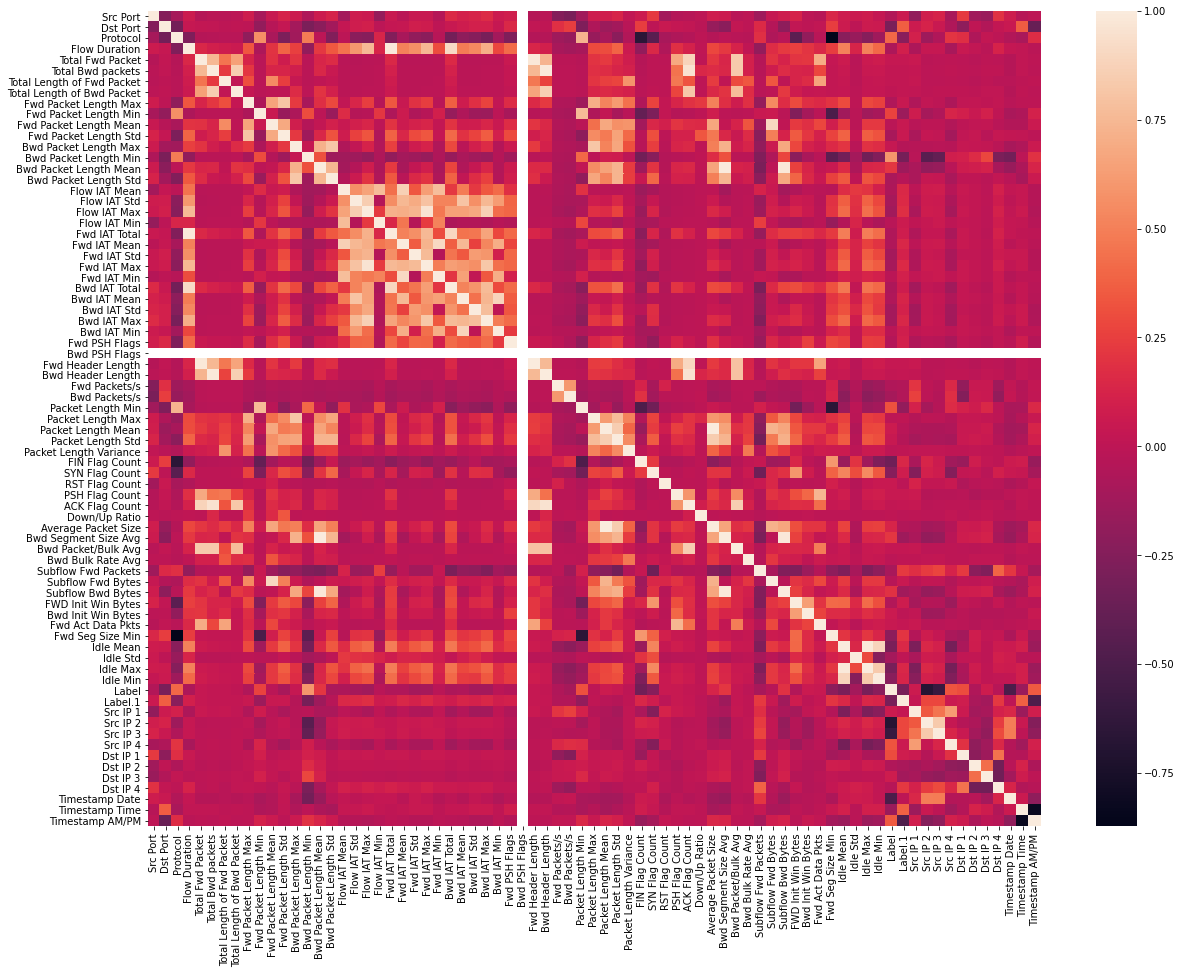

In [29]:
import seaborn as sns
plt.figure(figsize=(20,15))
sns.heatmap(data=data.corr())

In [30]:
data.drop("Bwd PSH Flags",axis=1, inplace=True)

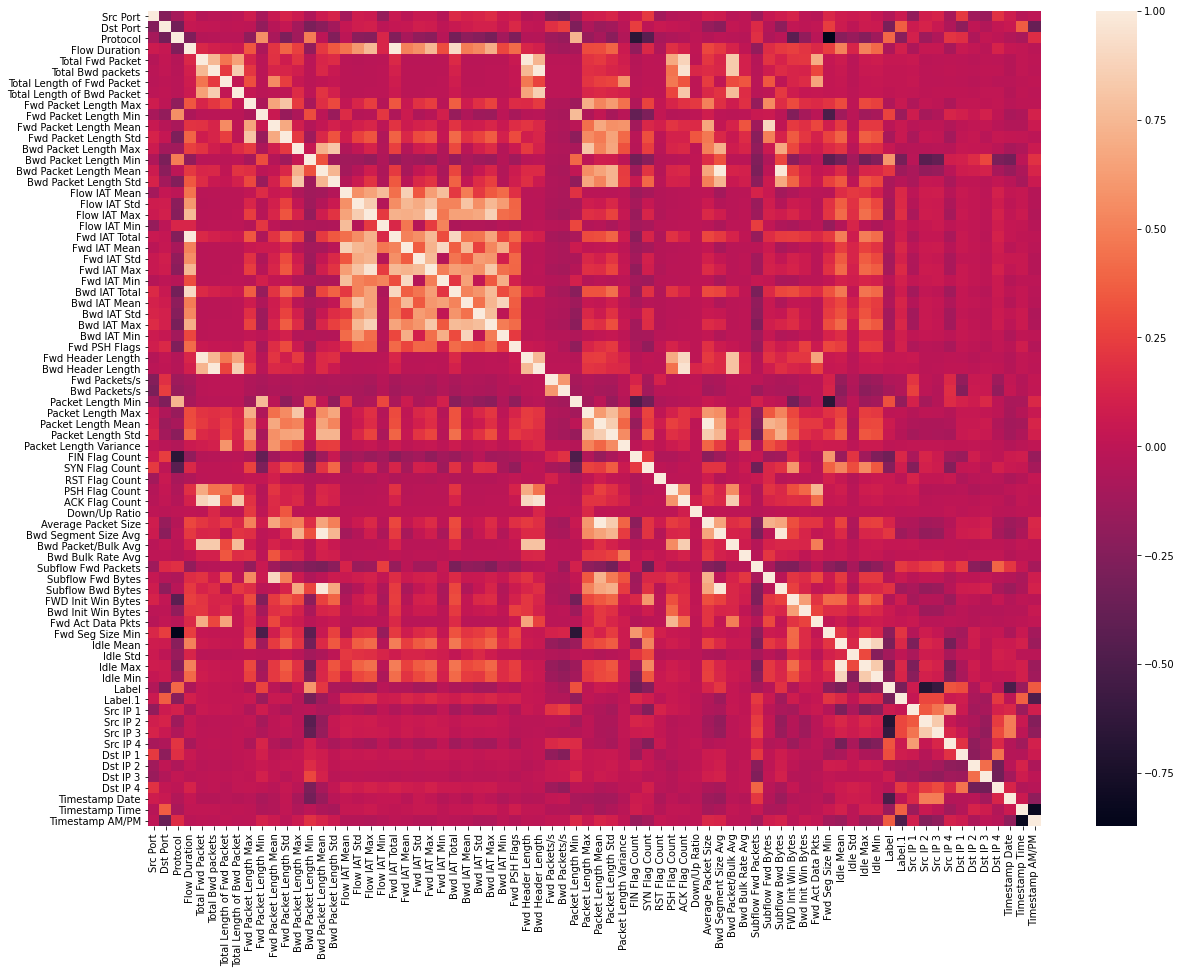

In [31]:
plt.figure(figsize=(20,15))
sns.heatmap(data=data.corr())

## Task 3: Train a  Model
* Which ML model would you choose and why?
* Train and evaluate the model using the train data
* Is the data blanced? What are the implications, how can you deal with this?
* Discuss the results -> possible improvements?


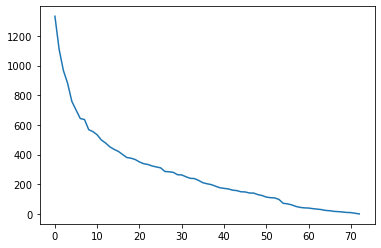

In [32]:
from sklearn.decomposition import PCA

data_tmp = data.drop('Label',axis=1)
pca = PCA(random_state=0)
pca.fit(data_tmp)

plt.plot(np.arange(len(pca.singular_values_)),pca.singular_values_)
plt.show;


In [33]:
pca = PCA(n_components=60)
pca.fit(data_tmp)
data_new = pca.transform(data_tmp)
print ("original X:",data.shape, " new basis: ", data_new.shape)

original X: (141530, 74)  new basis:  (141530, 60)


In [34]:
from sklearn.model_selection import train_test_split
#training and test data
X = data.drop('Label',axis=1)  #data_new --> not better
y = data['Label']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

### 1. Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn import metrics

In [36]:
model_params = {
    "n_estimators": randint(4,200),
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_leaf': randint(1,4),
    'min_samples_split': randint(2,9)
}

rf_model = rfc(class_weight='balanced', n_jobs=-1)
clf = RandomizedSearchCV(rf_model, model_params, n_iter=10, cv=5, random_state=0)

model = clf.fit(X_train, y_train)
model.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 92}

In [37]:
clf = model.best_estimator_
rf_pred = clf.predict(X_test)

#### 2. K-Nearest Neighbors Classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier as knn

model_params = {
    'n_neighbors': randint(1,20)
}

knn_model = knn(n_jobs=-1)
clf = RandomizedSearchCV(knn_model, model_params, n_iter=5, cv=5, random_state=0)

model = clf.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 1}

In [39]:
clf = model.best_estimator_
knn_pred = clf.predict(X_test)

## Task 4: Evaluate 
* report the F1-Score on the test data - Who will build the bes model?

##### Label
-  0: NonTor
-  1: Non VPN
-  2: Tor
-  3: VPN


#### Random Forest Classifier - best model

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

acc = accuracy_score(y_test, rf_pred)
prec = precision_score(y_test,rf_pred, average='micro')
rec = recall_score(y_test, rf_pred,average='micro')
f1 = f1_score(y_test, rf_pred, average='micro')
print('Accuracy:', acc)
print('Precision', prec)
print('Recall', rec)
print('F1:', f1)

Accuracy: 0.9998940154030947
Precision 0.9998940154030947
Recall 0.9998940154030947
F1: 0.9998940154030947


In [41]:
print(classification_report(y_test,rf_pred, output_dict= True))

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18573}, '1': {'precision': 0.9995877988458368, 'recall': 1.0, 'f1-score': 0.9997938569367141, 'support': 4850}, '2': {'precision': 0.9965034965034965, 'recall': 0.9930313588850174, 'f1-score': 0.9947643979057592, 'support': 287}, '3': {'precision': 1.0, 'recall': 0.9997824194952132, 'f1-score': 0.9998911979109999, 'support': 4596}, 'accuracy': 0.9998940154030947, 'macro avg': {'precision': 0.9990228238373333, 'recall': 0.9982034445950576, 'f1-score': 0.9986123631883682, 'support': 28306}, 'weighted avg': {'precision': 0.9998939210025722, 'recall': 0.9998940154030947, 'f1-score': 0.9998939282816708, 'support': 28306}}


In [42]:
confusion_matrix(rf_pred, y_test)

array([[18573,     0,     0,     0],
       [    0,  4850,     2,     0],
       [    0,     0,   285,     1],
       [    0,     0,     0,  4595]], dtype=int64)

#### K-Nearest Neighbors Classifier

In [43]:
acc = accuracy_score(y_test, knn_pred)
prec = precision_score(y_test,knn_pred, average='micro')
rec = recall_score(y_test,knn_pred,average='micro')
f1 = f1_score(y_test, knn_pred, average='micro')
print('Accuracy:', acc)
print('Precision', prec)
print('Recall', rec)
print('F1:', f1)

Accuracy: 0.9983749028474528
Precision 0.9983749028474528
Recall 0.9983749028474528
F1: 0.9983749028474528


In [44]:
print(classification_report(y_test,knn_pred, output_dict= True))

{'0': {'precision': 0.9994615840198137, 'recall': 0.9994615840198137, 'f1-score': 0.9994615840198137, 'support': 18573}, '1': {'precision': 0.9956745623069001, 'recall': 0.996701030927835, 'f1-score': 0.996187532199897, 'support': 4850}, '2': {'precision': 0.9755244755244755, 'recall': 0.9721254355400697, 'f1-score': 0.9738219895287957, 'support': 287}, '3': {'precision': 0.9982578397212544, 'recall': 0.9973890339425587, 'f1-score': 0.9978232477144101, 'support': 4596}, 'accuracy': 0.9983749028474528, 'macro avg': {'precision': 0.9922296153931109, 'recall': 0.9914192711075692, 'f1-score': 0.9918235883657291, 'support': 28306}, 'weighted avg': {'precision': 0.9983745560313316, 'recall': 0.9983749028474528, 'f1-score': 0.9983746233540485, 'support': 28306}}


In [45]:
confusion_matrix(knn_pred, y_test)

array([[18563,     5,     0,     5],
       [    7,  4834,     7,     7],
       [    1,     6,   279,     0],
       [    2,     5,     1,  4584]], dtype=int64)